In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sys
import numpy as np, pandas as pd
from tqdm import tqdm
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt

code_path = r"/bighome/rgsohal/CMS_HCAL_ML_OnlineDQM-main"

data_path = code_path+"/data"
sys.path.append(code_path)
sys.path.append(code_path+"/src")

import utilities as util

%matplotlib inline

# HCAL DQM Segmentation: UMAP

In [2]:
from prepare_hcal_seg_subdetector_mask import *

In [3]:
# hcal emap config file
hcal_config_datafilepath_csv = rf"{data_path}/HCAL_CONFIG/hcal_segmentation_info.csv"
hcal_seg_info_df = load_seg_map(hcal_config_datafilepath_csv)
hcal_seg_info_df.head()

load_seg_map...{hcal_config_datafilepath_csv}
loading  /bighome/rgsohal/CMS_HCAL_ML_OnlineDQM-main/data/HCAL_CONFIG/hcal_segmentation_info.csv
(17136, 28)
(17136, 27)
Side
-1    8568
 1    8568
Name: count, dtype: int64
Eta
1     1584
20     864
19     864
18     720
16     720
10     576
5      576
27     576
13     576
9      576
15     576
14     576
6      576
4      576
8      576
2      576
12     576
11     576
3      576
7      576
25     504
26     504
28     504
22     432
24     432
21     432
23     432
17     288
29     216
Name: count, dtype: int64
Phi
55    336
23    336
35    336
59    336
71    336
     ... 
68    168
72    168
38    168
36    168
2     168
Name: count, Length: 72, dtype: int64
dPhi
1    12096
2     3888
4     1008
0      144
Name: count, dtype: int64
type/depth
 2      3600
 3      3564
 1      3456
 4      3348
 5      1044
 6       900
 7       864
-999     288
 0        72
Name: count, dtype: int64
Det
HB          9072
HE          6768
CALIB_HB    

,Side,Eta,Phi,dPhi,type/depth,Det,RBX,Sector,MB_NO,BV,...,ppCpl,ppLC,dodec,Crate,uHTR,uHTR_FI,FEDid,QIEid,TP_FI,TP_CH
0,-1,10,14,1,4,HB,HBM04,4,30,59,...,HBM04_RM1A,1,1,20,1,0,1102,999999,4,7
1,-1,9,14,1,4,HB,HBM04,4,29,63,...,HBM04_RM1A,1,1,20,1,0,1102,999999,4,3
2,-1,12,14,1,4,HB,HBM04,4,22,57,...,HBM04_RM1A,1,1,20,1,0,1102,999999,5,7
3,-1,11,14,1,4,HB,HBM04,4,21,61,...,HBM04_RM1A,1,1,20,1,0,1102,999999,5,3
4,-1,10,14,1,2,HB,HBM04,4,28,3,...,HBM04_RM1A,1,1,20,1,0,1102,999999,4,7


### Subdetector = "he"

In [4]:
subdetector_name = "he"
expected_mask_shape = [64, 72, 7] # full hcal seg ieta and iphi area and depth up to 7 

In [5]:
subdetector_seg_info_df = select_subdetector_seg_map(hcal_seg_info_df, subdetector=subdetector_name)

hcal_subdetector_seg_mask = subdetector_seg_map_to_seg_mask(subdetector_seg_info_df, 
                                                            ieta_len=expected_mask_shape[0], iphi_len=expected_mask_shape[1], depth_len=expected_mask_shape[2])

select_subdetector_seg_map...he
Side
-1    3384
 1    3384
Name: count, dtype: int64
Eta
19    864
20    864
18    720
28    504
26    504
27    504
22    432
24    432
21    432
23    432
25    432
17    288
29    216
16    144
Name: count, dtype: int64
Phi
13    148
29    148
33    148
31    148
69    148
     ... 
24     40
42     40
40     40
8      40
56     40
Name: count, Length: 72, dtype: int64
dPhi
2    3888
1    2880
Name: count, dtype: int64
type/depth
2    1224
3    1224
4    1152
1    1080
5    1008
6     864
7     216
Name: count, dtype: int64
Det
HE    6768
Name: count, dtype: int64
RBX
HEM04    188
HEM05    188
HEM10    188
HEM11    188
HEP10    188
HEP11    188
HEM16    188
HEM17    188
HEP16    188
HEP17    188
HEM12    188
HEM13    188
HEP12    188
HEP13    188
HEM14    188
HEM15    188
HEP14    188
HEP01    188
HEP18    188
HEM01    188
HEM02    188
HEP04    188
HEP05    188
HEM06    188
HEM07    188
HEP06    188
HEP07    188
HEM03    188
HEM18    188
HEP02    188


#### Saving Mask

In [6]:
hcal_subdetector_seg_mask.shape
save_seg_mask(subdetector_name, rf"{data_path}/HCAL_CONFIG", hcal_subdetector_seg_mask, isemap_adjust=False)

(64, 72, 7)

save_seg_mask...
/bighome/rgsohal/CMS_HCAL_ML_OnlineDQM-main/data/HCAL_CONFIG\he_segmentation_config_mask
plot_subdetector_seg_mask...
saving  /bighome/rgsohal/CMS_HCAL_ML_OnlineDQM-main/data/HCAL_CONFIG\he_segmentation_config_mask.jpg


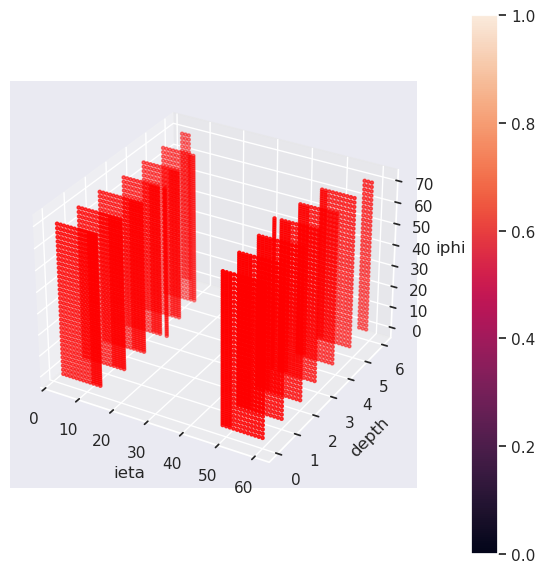

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

data_shape = hcal_subdetector_seg_mask.shape
x,y,z = hcal_subdetector_seg_mask.transpose(0, 2, 1).nonzero()
ax_3d = ax.scatter(x, y, z, c="red", marker=".")
_ = ax.set_zlabel("iphi")
_ = ax.set_ylabel("depth")
_ = ax.set_xlabel("ieta")
cbar = plt.colorbar(ax_3d, pad=0.1)
fig.show()

### Subdetector = "hb"

In [8]:
subdetector_name = "hb"
expected_mask_shape = [64, 72, 4] # full hcal seg ieta and iphi area and depth up to 4

In [9]:
subdetector_seg_info_df = select_subdetector_seg_map(hcal_seg_info_df, subdetector=subdetector_name)
hcal_subdetector_seg_mask = subdetector_seg_map_to_seg_mask(subdetector_seg_info_df, 
                                                            ieta_len=expected_mask_shape[0], iphi_len=expected_mask_shape[1], depth_len=expected_mask_shape[2])

select_subdetector_seg_map...hb
Side
-1    4536
 1    4536
Name: count, dtype: int64
Eta
10    576
9     576
12    576
11    576
4     576
3     576
2     576
1     576
8     576
7     576
6     576
5     576
15    576
14    576
13    576
16    432
Name: count, dtype: int64
Phi
14    126
13    126
66    126
59    126
60    126
     ... 
7     126
8     126
9     126
10    126
55    126
Name: count, Length: 72, dtype: int64
dPhi
1    9072
Name: count, dtype: int64
type/depth
2    2304
1    2304
3    2304
4    2160
Name: count, dtype: int64
Det
HB    9072
Name: count, dtype: int64
RBX
HBM04    252
HBM05    252
HBM10    252
HBM11    252
HBP10    252
HBP11    252
HBM16    252
HBM17    252
HBP16    252
HBP17    252
HBM12    252
HBM13    252
HBP12    252
HBP13    252
HBM14    252
HBM15    252
HBP14    252
HBP01    252
HBP18    252
HBM01    252
HBM02    252
HBP04    252
HBP05    252
HBM06    252
HBM07    252
HBP06    252
HBP07    252
HBM03    252
HBM18    252
HBP02    252
HBP03    252
HBM08  

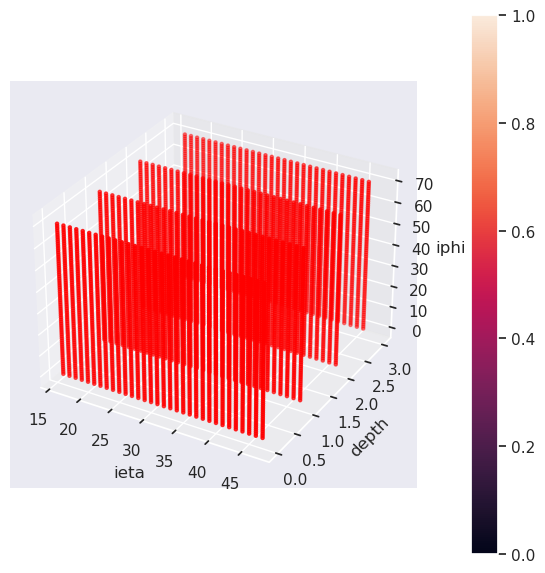

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

data_shape = hcal_subdetector_seg_mask.shape
x,y,z = hcal_subdetector_seg_mask.transpose(0, 2, 1).nonzero()
ax_3d = ax.scatter(x, y, z, c="red", marker=".")
_ = ax.set_zlabel("iphi")
_ = ax.set_ylabel("depth")
_ = ax.set_xlabel("ieta")
cbar = plt.colorbar(ax_3d, pad=0.1)
fig.show()

#### Saving Mask

In [11]:
hcal_subdetector_seg_mask.shape
save_seg_mask(subdetector_name, rf"{data_path}/HCAL_CONFIG", hcal_subdetector_seg_mask, isemap_adjust=False)

(64, 72, 4)

save_seg_mask...
/bighome/rgsohal/CMS_HCAL_ML_OnlineDQM-main/data/HCAL_CONFIG\hb_segmentation_config_mask
plot_subdetector_seg_mask...
saving  /bighome/rgsohal/CMS_HCAL_ML_OnlineDQM-main/data/HCAL_CONFIG\hb_segmentation_config_mask.jpg


## Scripts

In [38]:
!python ../src/prepare_hcal_seg_subdetector_mask.py

load_seg_map...{hcal_config_datafilepath_csv}
loading  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\CERN\InductionProject\CMS_HCAL_ML_OnlineDQM\data\HCAL_CONFIG\hcal_segmentation_info.csv
(17136, 28)
(17136, 27)
-1    8568
 1    8568
Name: Side, dtype: int64
1     1584
20     864
19     864
18     720
16     720
10     576
5      576
27     576
13     576
9      576
15     576
14     576
6      576
4      576
8      576
2      576
12     576
11     576
3      576
7      576
25     504
26     504
28     504
22     432
24     432
21     432
23     432
17     288
29     216
Name: Eta, dtype: int64
55    336
23    336
35    336
59    336
71    336
     ... 
68    168
72    168
38    168
36    168
2     168
Name: Phi, Length: 72, dtype: int64
1    12096
2     3888
4     1008
0      144
Name: dPhi, dtype: int64
 2      3600
 3      3564
 1      3456
 4      3348
 5      1044
 6       900
 7       864
-999     288
 0        72
Name: type/depth, dtype: int64
HB          9072
HE        